# Facet Grid
It used for plotting catplot, relplot and displot. It plots small multiples from categorical data.
The FacetGrid is produces by following three steps:
1. Set up FacetGrid using `sns.FacetGrid()`.
2. Specify the plot type using `g.map()` or `g.map_dataframe()`.
3. Customize the facet using methods and attributes.

### Importing libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

### Loading dataset

In [2]:
penguins=sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins.shape

(344, 7)

### Setting Facet Grid

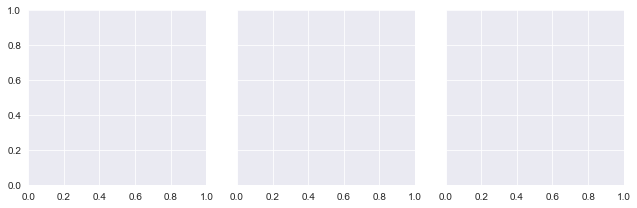

In [4]:
#initiating with columns
g=sns.FacetGrid(penguins, col='island');

In [5]:
type(g)

seaborn.axisgrid.FacetGrid

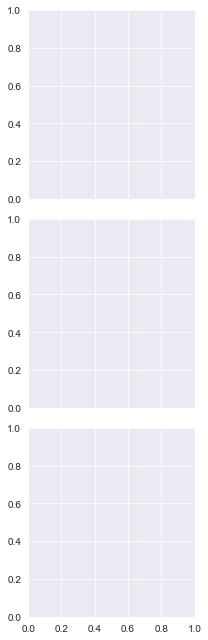

In [6]:
#initiating with rows
g=sns.FacetGrid(penguins, row='island')

### Mapping

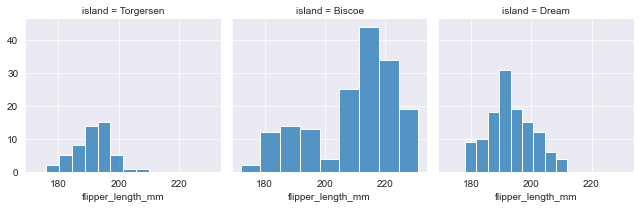

In [7]:
#Mapping using .map()
g=sns.FacetGrid(penguins, col='island')
g.map(sns.histplot, 'flipper_length_mm');

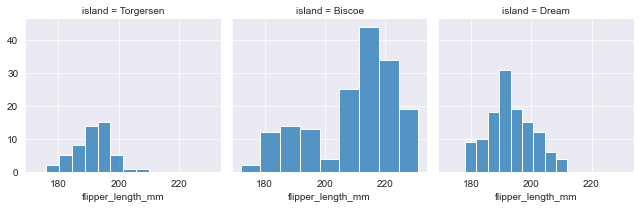

In [8]:
#Mapping using .map_dataframe()
g=sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.histplot, 'flipper_length_mm');
#looks like it does exact same thing

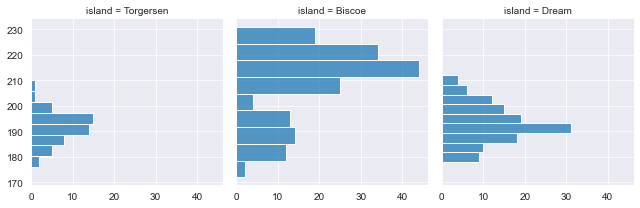

In [9]:
#but the difference is .map() doesn't allow to assign the axis where .map_dataframe() does
#changing the orientation of the histograms by assigning them on y axis
g=sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.histplot, y='flipper_length_mm'); 

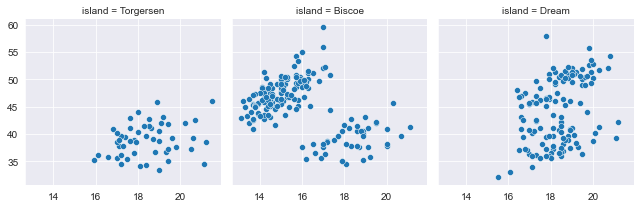

In [10]:
#Creating scatterplot using .map_dataframe()
g=sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot,x='bill_depth_mm', y='bill_length_mm'); 

### Methods and Attributes

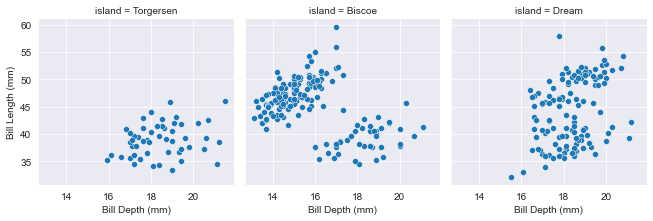

In [11]:
#Setting axis labels using using .set_axis_labels()
g=sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot,x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Bill Depth (mm)','Bill Length (mm)'); 

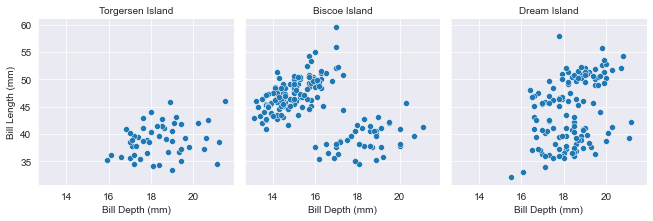

In [12]:
#Setting titles for the plots using .set_titles()
g=sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot,x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Bill Depth (mm)','Bill Length (mm)')
g.set_titles(col_template='{col_name} Island'); 

### Using both rows and columns for plotting

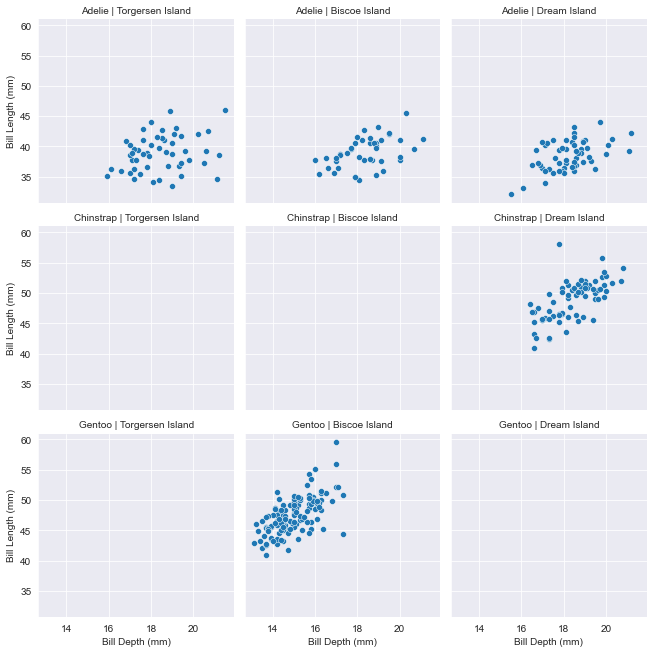

In [13]:
g=sns.FacetGrid(penguins, col='island', row='species')
g.map_dataframe(sns.scatterplot,x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Bill Depth (mm)','Bill Length (mm)')
g.set_titles(col_template='{col_name} Island', row_template='{row_name}');

#we got blank plots for the islands where these species are absent

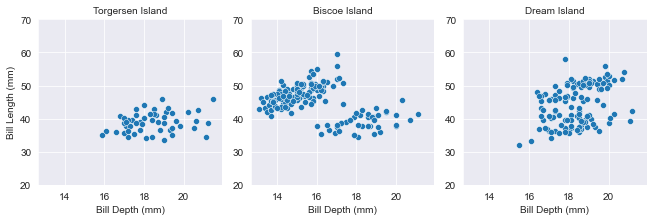

In [14]:
#sharey for assigning individual axis to each plot
#ylim for limit of the y axis
g=sns.FacetGrid(penguins, col='island', sharey=False, ylim=(20,70))
g.map_dataframe(sns.scatterplot,x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('Bill Depth (mm)','Bill Length (mm)')
g.set_titles(col_template='{col_name} Island');

### Hue and Palette

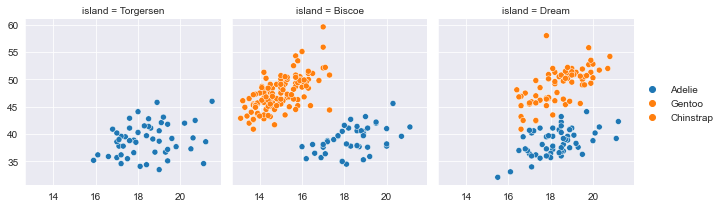

In [15]:
#Hue
g=sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot,x='bill_depth_mm', y='bill_length_mm', hue='species')
g.add_legend()
#We cant use hue in the .map_dataframe() function here it is assigning gentoo and chinstrap the same hue;

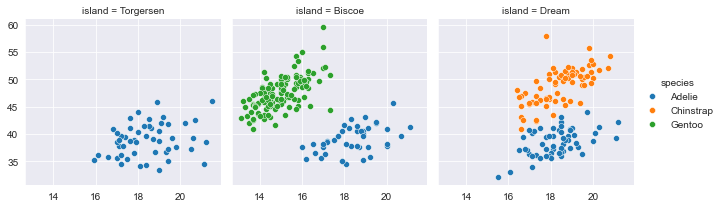

In [16]:
#Adding hue to the FacetGrid() arguements
g=sns.FacetGrid(penguins, col='island',hue='species')
g.map_dataframe(sns.scatterplot,x='bill_depth_mm', y='bill_length_mm')
g.add_legend();

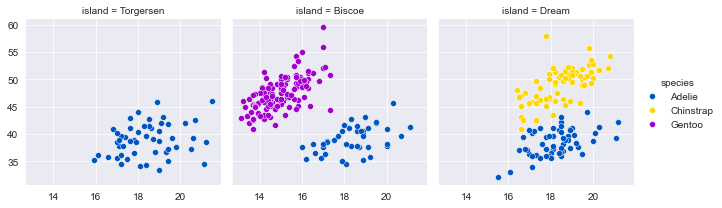

In [17]:
#Palette for different shades
g=sns.FacetGrid(penguins, col='island',hue='species', palette='prism')
g.map_dataframe(sns.scatterplot,x='bill_depth_mm', y='bill_length_mm')
g.add_legend();

### Custom Functions
We can create functinos of our own and provide them to `.map_dataframe()` as an arguement. The condition for the defined function is, they should accept the arguement in the form of data.

In [18]:
#function that adds line of mean to the plot

import matplotlib.pyplot as plt
import numpy as np

def add_mean_line(data, var=None, **kws):
    
    # If no variable provided skip adding mean line
    if not var: return
    
    #Calculate mean for each group
    m = np.mean(data[var])
    
    #Get current axis
    ax = plt.gca()
    
    #add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    #annotate group mean
    x_pos=0.65
    if m > 5000: x_pos=0.2
    ax.text(x_pos, 0.7, f'mean={m:.0f}', 
            transform=ax.transAxes,   #transforms positions to range from (0,0) to (1,1)
            color='maroon', fontweight='bold', fontsize=12)

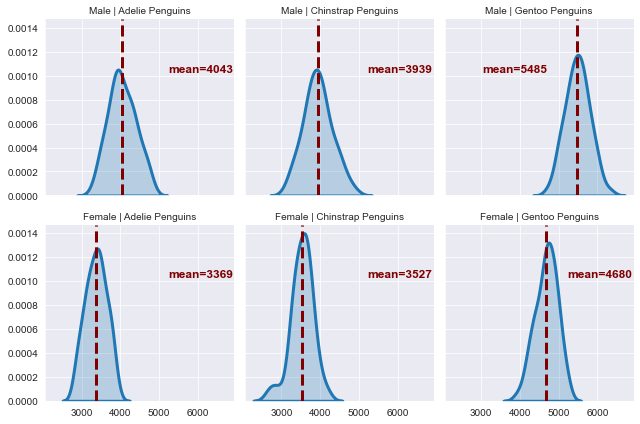

In [19]:
quantity='body_mass_g'
g = sns.FacetGrid(penguins, row='sex', col='species')
g.map_dataframe(sns.kdeplot, x=quantity, lw=3, shade=True)
#giving our function as the arguement
g.map_dataframe(add_mean_line, var=quantity)
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');

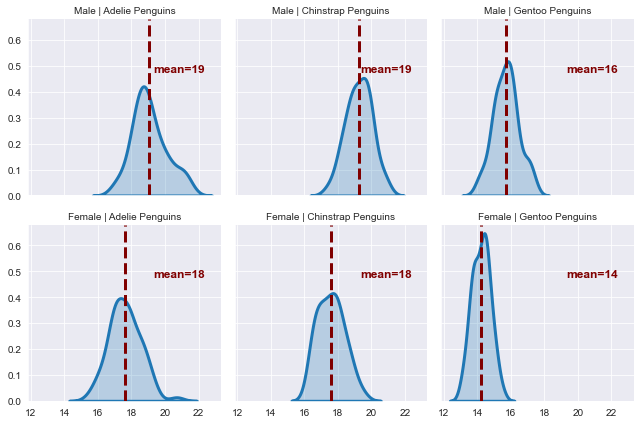

In [20]:
#We can change the quantity and get another plot
quantity='bill_depth_mm'
g = sns.FacetGrid(penguins, row='sex', col='species')
g.map_dataframe(sns.kdeplot, x=quantity, lw=3, shade=True)
#giving our function as the arguement
g.map_dataframe(add_mean_line, var=quantity)
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');

We will see more about FacetGrid in catplot, displot and relplot.

The End